In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import data and define initial documents
dfList = []
selected_columns = ['Paper title', 'Paper DOI', 'Reader name', 'Discipline of paper', 
                    'Metric Category', 'Diversity-based?', 'Agency-based?', 'Metric Short Description']
topics_dictionary = ['Urban-community-disaster', 'Health and psychological',
                     'Supply-chain', 'Food and agriculture', 'Energy and power-grid',
                     'Ecological and environmental']

file = open('data/meta-review_reading.xlsx', 'rb')
for topic_number in range (1, 7):
    for sorting in ['citation', 'newer']:
        dfTopic = pd.read_excel(file, sheet_name=f'{topic_number}-{sorting}', engine='openpyxl')
        dfTopic = dfTopic[selected_columns]
        dfTopic['topic'] = topics_dictionary[topic_number-1]
        dfTopic['sorting'] = sorting
        dfList.append(dfTopic)

df = pd.concat(dfList, ignore_index=True)

In [8]:
new_columns = ['paper_title', 'paper_DOI', 'reader', 'discipline', 'category', 'diversity-based', 
                'agency-based', 'description', 'topic', 'sorting']
new_columns = dict(zip(list(df.columns), new_columns))
df = df.rename(columns=new_columns)
df = df.replace(0, 'False')
df = df.replace(1, 'True')
df.head(2)

,paper_title,paper_DOI,reader,discipline,category,diversity-based,agency-based,description,topic,sorting
0,A metric and frameworks for resilience analysi...,10.1016/j.ress.2013.07.004,Jonathan,Engineering,Performance under disruption,True,False,As the product of absorptive capacity(a speed ...,Urban-community-disaster,citation
1,A metric and frameworks for resilience analysi...,10.1016/j.ress.2013.07.004,Jonathan,Engineering,Performance under disruption,True,False,the probability of the system failure (grafili...,Urban-community-disaster,citation


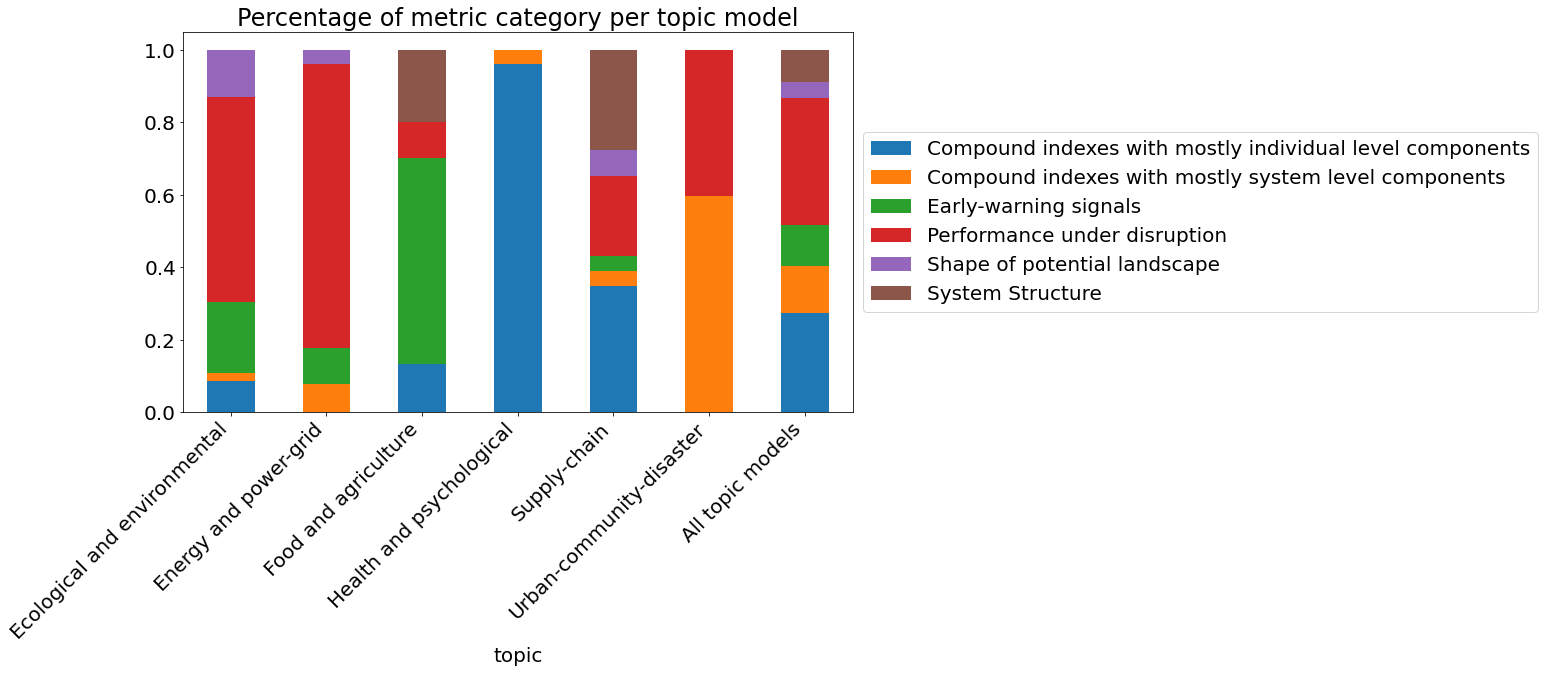

In [9]:
# Metric category per topic model

dfNotNull = df[~df['category'].isin(['None of above', 'Not identifiable'])]
dfGroup = dfNotNull.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of metric category per topic model')
plt.show()

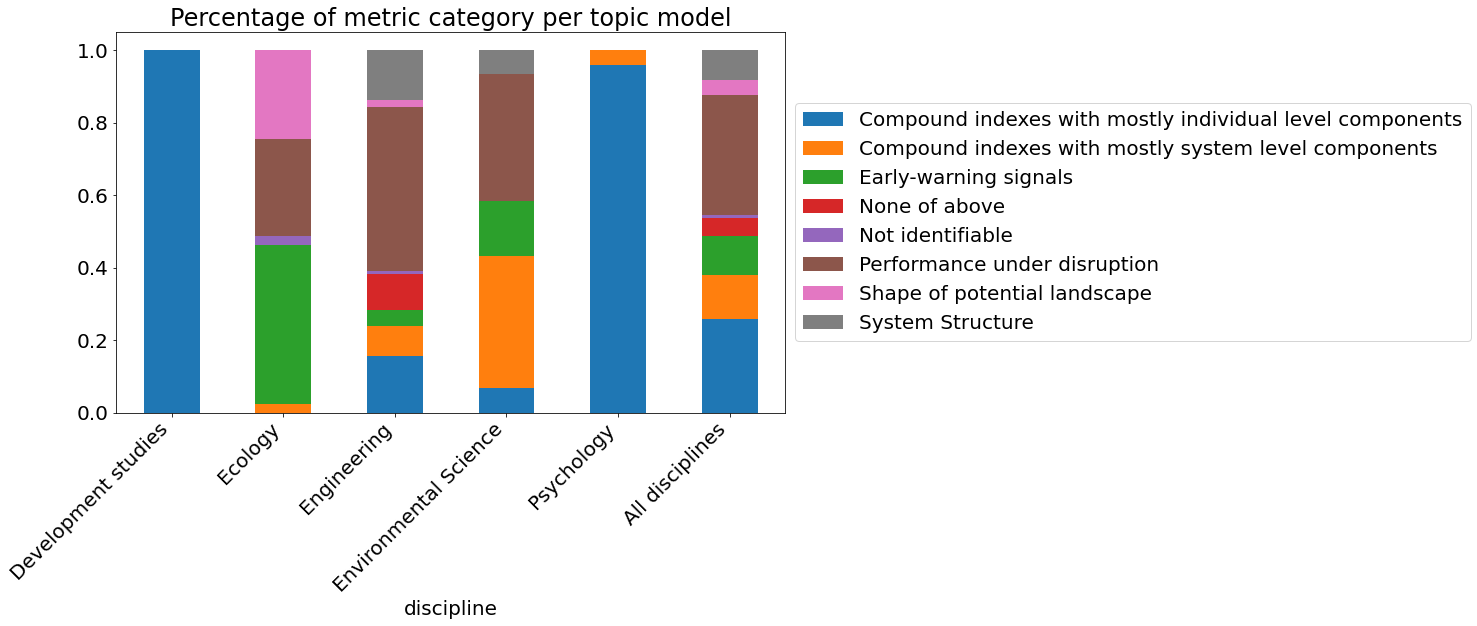

In [10]:
# Metric category per discipline model

dfGroup = df.groupby(['discipline', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All disciplines'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of metric category per topic model')
plt.show()

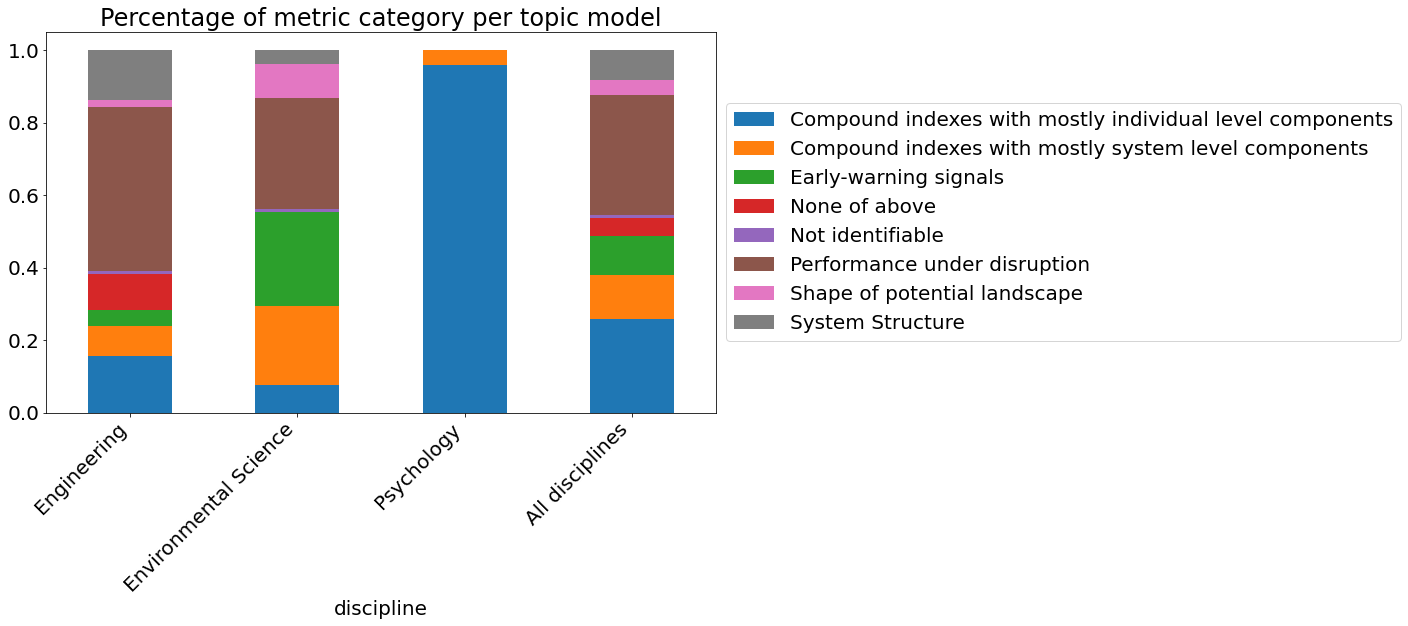

In [11]:
# Metric category per discipline model

dfOnlyEnvScience = df.replace(['Ecology', 'Development studies'], 'Environmental Science')
dfGroup = dfOnlyEnvScience.groupby(['discipline', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All disciplines'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of metric category per topic model')
plt.show()

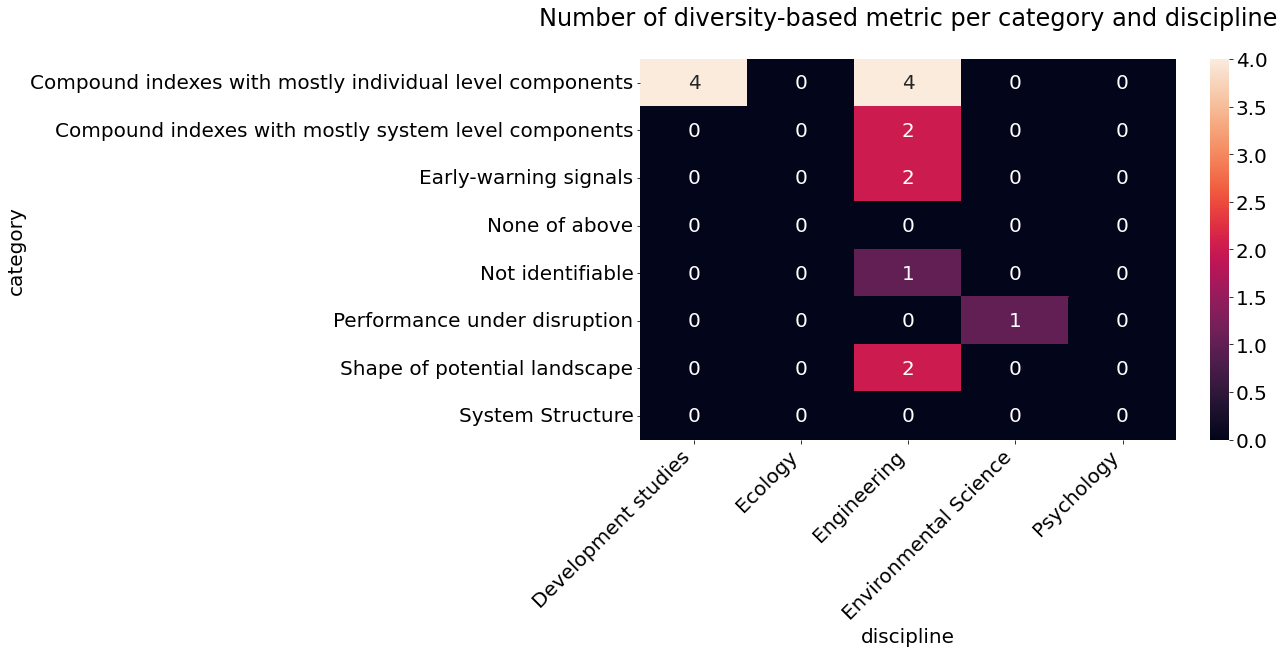

In [63]:
dfBool = df.replace('False', 0)
dfBool = dfBool.replace('True', 1)

dfGroup = dfBool[['discipline', 'category', 'diversity-based']].groupby(['discipline', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "discipline", "diversity-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of diversity-based metric per category and discipline\n')
plt.show()

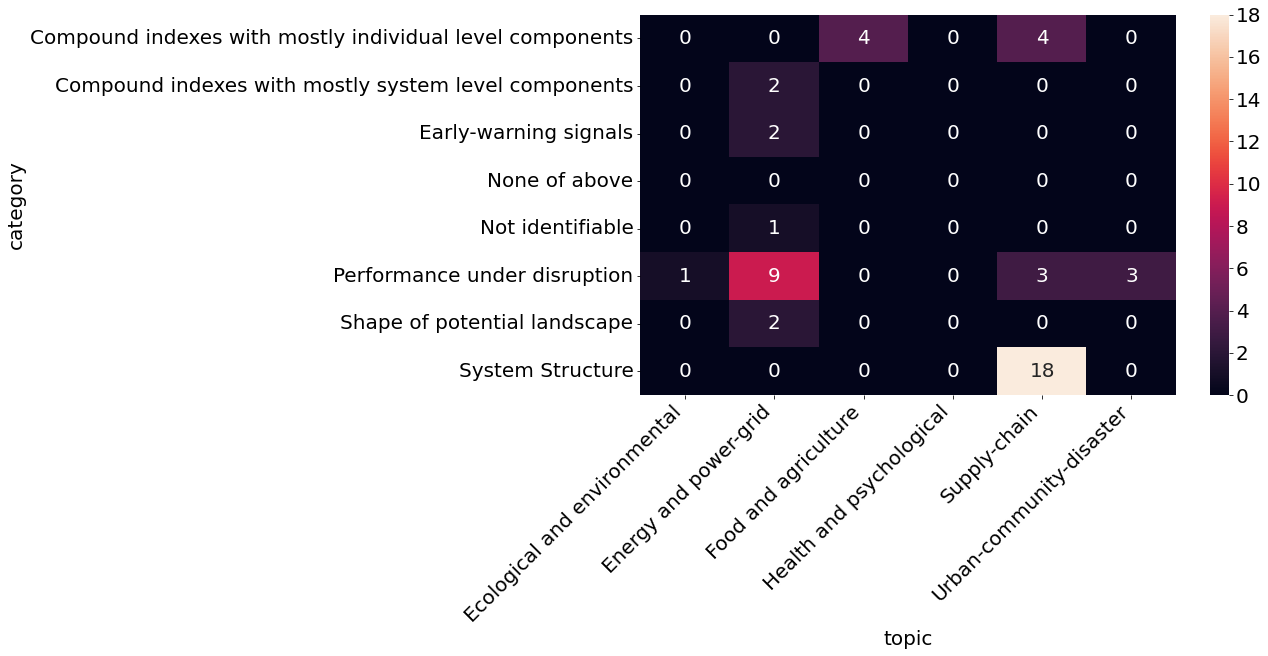

In [58]:
dfBool = df.replace('False', 0)
dfBool = dfBool.replace('True', 1)

dfGroup = dfBool[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "topic", "diversity-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of diversity-based metric per category and topic modelling\n')
plt.show()

<Figure size 864x504 with 0 Axes>

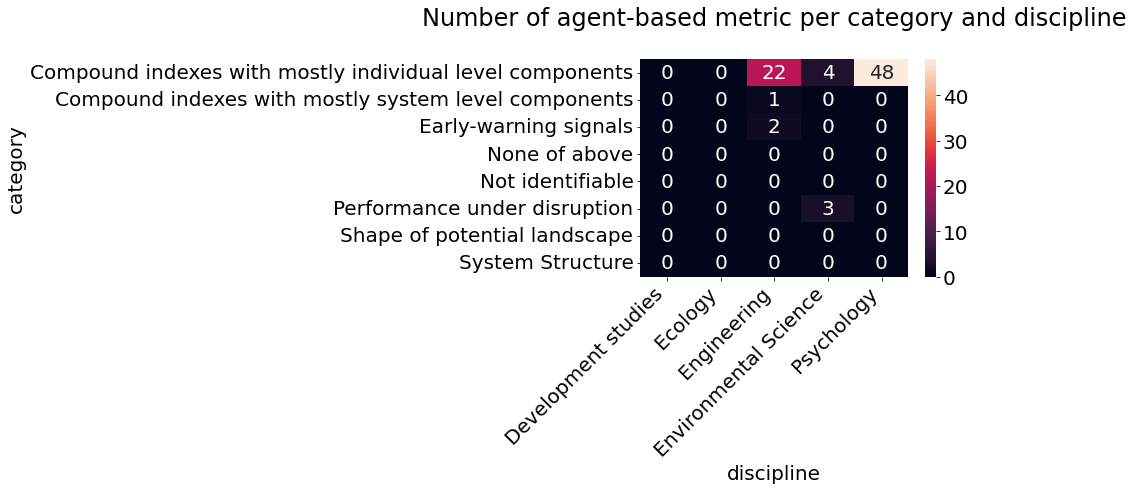

In [65]:
dfBool = df.replace('False', 0)
dfBool = dfBool.replace('True', 1)

dfGroup = dfBool[['discipline', 'category', 'agency-based']].groupby(['discipline', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "discipline", "agency-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
plt.figure()
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of agent-based metric per category and discipline\n')
plt.show()

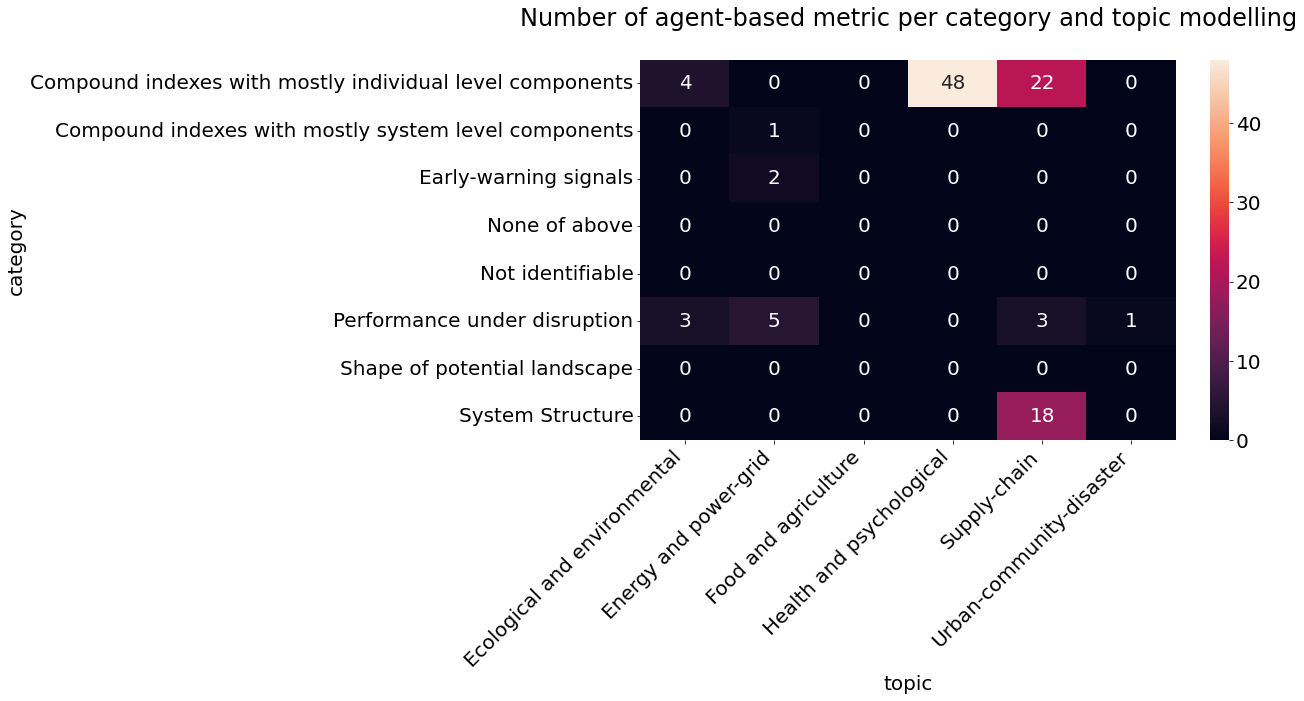

In [66]:
dfBool = df.replace('False', 0)
dfBool = dfBool.replace('True', 1)

dfGroup = dfBool[['topic', 'category', 'agency-based']].groupby(['topic', 'category']).sum()
dfGroup = dfGroup.unstack()
dfGroup.reset_index(inplace=True)
dfGroup = dfGroup.pivot("category", "topic", "agency-based")
dfGroup = dfGroup.fillna(0)

plt.figure(figsize=(12, 7))
sns.heatmap(dfGroup, annot=True)
plt.xticks(rotation=45, ha='right')
plt.title('Number of agent-based metric per category and topic modelling\n')
plt.show()

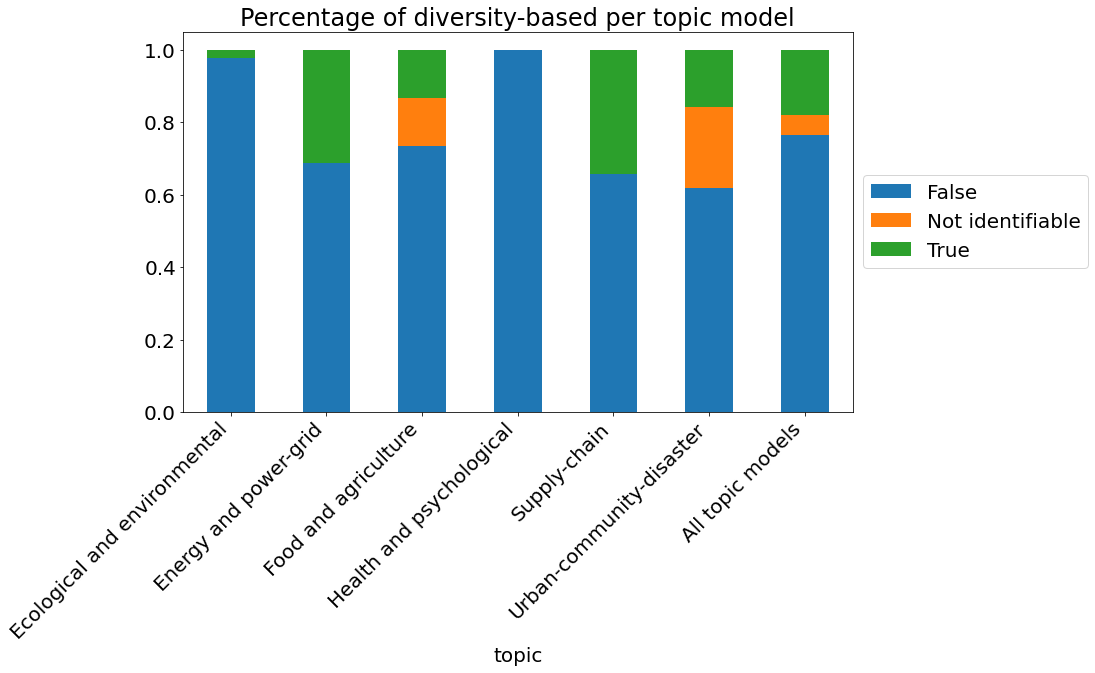

In [148]:
# Metric diversity-based per topic model

dfGroup = df.groupby(['topic', 'diversity-based']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of diversity-based per topic model')
plt.show()

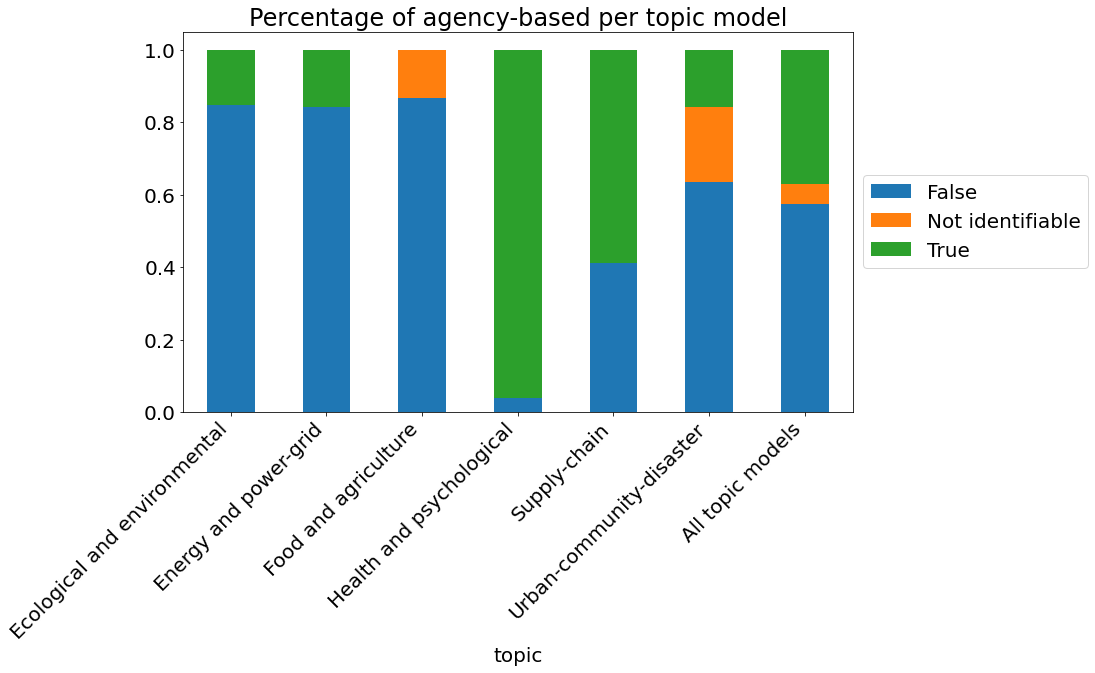

In [146]:
# Metric agency-based per topic model

dfGroup = df.groupby(['topic', 'agency-based']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)


plt.rc('font', size=20)
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Percentage of agency-based per topic model')
plt.show()